In [3]:
import pandas as pd
import numpy as np

In [4]:
train_df = pd.read_csv('ml_10_medicalalert_train.csv')
final_test = pd.read_csv('ml_10_medicalalert_test.csv')

In [5]:
train_df[train_df['patientid'] == 'patientid']

,patientid,timestamp,gender,age,di,copd,chf,ht,afib,w,pw,bps,bpd,spo2,hr,gl,alert
21722,patientid,timestamp,gender,age,di,copd,chf,ht,afib,w,pw,bps,bpd,spo2,hr,gl,alert


In [6]:
train_df = train_df.iloc[train_df['alert'].dropna().index]

In [7]:
train_df.drop(index=21722, inplace=True)
train_df

,patientid,timestamp,gender,age,di,copd,chf,ht,afib,w,pw,bps,bpd,spo2,hr,gl,alert
0,454198825010375512,2015-09-25 1:18:09,F,74,0,0,0,1,1,88.9947504,89.0854688,145,72,92,79,NaN,No
1,304887778694000807,2015-07-15 10:52:53,F,82,1,1,0,0,1,77.564232,77.564232,128,70,95,73,135,No
2,719782720396991269,2015-11-15 15:08:40,M,76,1,0,0,1,1,87.67933498,86.99894698,136,65,96,61,NaN,No
3,25450399443627950,2015-11-11 19:36:39,F,77,0,1,1,1,0,71.39537803,71.98504902,124,60,99,100,NaN,No
4,534906646683042373,2015-06-15 13:07:23,F,74,1,0,0,1,1,87.089664,87.089664,163,81,99,71,141,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,740754555106398996,2015-09-18 19:16:03,M,90,0,0,1,1,0,0,0,95,55,NaN,NaN,NaN,No
24996,183438107768703223,2015-07-11 19:44:06,F,73,1,0,1,1,1,0,0,NaN,NaN,96.17666626,41,NaN,No
24997,234531520285098844,2015-07-11 17:35:22,M,63,1,0,1,1,0,133.0838928,132.5849416,160,93,99,86,188,No
24998,848277834632648446,2015-10-10 17:37:23,M,66,1,0,0,1,1,67.9027224,68.492392,149,90,96,67,NaN,No


In [8]:
train_df.dtypes

patientid    object
timestamp    object
gender       object
age          object
di           object
copd         object
chf          object
ht           object
afib         object
w            object
pw           object
bps          object
bpd          object
spo2         object
hr           object
gl           object
alert        object
dtype: object

In [9]:
final_test.dtypes

id             int64
patientid      int64
timestamp     object
gender        object
age            int64
di           float64
copd           int64
chf          float64
ht             int64
afib           int64
w            float64
pw           float64
bps          float64
bpd          float64
spo2         float64
hr           float64
gl           float64
dtype: object

In [10]:
# NaN 값을 기본적으로 처리
train_df['patientid'] = train_df['patientid'].fillna(-1).astype('int64')  # 예: -1로 대체
train_df['timestamp'] = pd.to_datetime(train_df['timestamp'])
train_df['gender']    = train_df['gender'].astype('category')
train_df['age']       = train_df['age'].fillna(0).astype(int)
train_df['di']        = train_df['di'].fillna(0).astype(int)
train_df['copd']      = train_df['copd'].fillna(0).astype(int)
train_df['chf']       = train_df['chf'].fillna(0).astype(int)
train_df['ht']        = train_df['ht'].fillna(0).astype(int)
train_df['afib']      = train_df['afib'].fillna(0).astype(int)
train_df['w']         = train_df['w'].fillna(0.0).astype(float)
train_df['pw']        = train_df['pw'].fillna(0.0).astype(float)
train_df['bps']       = train_df['bps'].fillna(0.0).astype(float)
train_df['bpd']       = train_df['bpd'].fillna(0).astype(int)
train_df['spo2']      = train_df['spo2'].fillna(0).astype(float)
train_df['hr']        = train_df['hr'].fillna(0).astype(int)
train_df['gl']        = train_df['gl'].fillna(0).astype(float)
train_df['alert']     = train_df['alert'].astype(object)
train_df.dtypes

patientid             int64
timestamp    datetime64[ns]
gender             category
age                   int32
di                    int32
copd                  int32
chf                   int32
ht                    int32
afib                  int32
w                   float64
pw                  float64
bps                 float64
bpd                   int32
spo2                float64
hr                    int32
gl                  float64
alert                object
dtype: object

In [11]:
final_test['patientid'] = final_test['patientid'].fillna(-1).astype('int64')  # 예: -1로 대체
final_test['timestamp'] = pd.to_datetime(final_test['timestamp'])
final_test['gender']    = final_test['gender'].astype('category')
final_test['age']       = final_test['age'].fillna(0).astype(int)
final_test['di']        = final_test['di'].fillna(0).astype(int)
final_test['copd']      = final_test['copd'].fillna(0).astype(int)
final_test['chf']       = final_test['chf'].fillna(0).astype(int)
final_test['ht']        = final_test['ht'].fillna(0).astype(int)
final_test['afib']      = final_test['afib'].fillna(0).astype(int)
final_test['w']         = final_test['w'].fillna(0.0).astype(float)
final_test['pw']        = final_test['pw'].fillna(0.0).astype(float)
final_test['bps']       = final_test['bps'].fillna(0.0).astype(float)
final_test['bpd']       = final_test['bpd'].fillna(0).astype(int)
final_test['spo2']      = final_test['spo2'].fillna(0).astype(float)
final_test['hr']        = final_test['hr'].fillna(0).astype(int)
final_test['gl']        = final_test['gl'].fillna(0).astype(float)
final_test.dtypes

id                    int64
patientid             int64
timestamp    datetime64[ns]
gender             category
age                   int32
di                    int32
copd                  int32
chf                   int32
ht                    int32
afib                  int32
w                   float64
pw                  float64
bps                 float64
bpd                   int32
spo2                float64
hr                    int32
gl                  float64
dtype: object

In [12]:
train_df.isna().sum() / len(train_df)

patientid    0.0
timestamp    0.0
gender       0.0
age          0.0
di           0.0
copd         0.0
chf          0.0
ht           0.0
afib         0.0
w            0.0
pw           0.0
bps          0.0
bpd          0.0
spo2         0.0
hr           0.0
gl           0.0
alert        0.0
dtype: float64

In [13]:
final_test.isna().sum() / len(train_df)

id           0.0
patientid    0.0
timestamp    0.0
gender       0.0
age          0.0
di           0.0
copd         0.0
chf          0.0
ht           0.0
afib         0.0
w            0.0
pw           0.0
bps          0.0
bpd          0.0
spo2         0.0
hr           0.0
gl           0.0
dtype: float64

### 체크리스트
```py
- #id        : 
- #patientid :  환자id
- #timestamp :  측정 시간
- #gender    :  성
- #age       :  나이
- #di        :  당뇨
- #copd      :  만성 폐질환
- #chf       :  심부전증
- #ht        :  고혈압
- #afib      :  심박세동
- #w         :  몸무게
- #pw        :  가장 최근 측정 된 무게 (위의 몸무게와 합칠 필요성)
- #bps       :  수축기 혈압
- #bpd       :  이완기 혈압
- #spo2      :  혈중 산소 포화도
- #hr        :  맥박
- #gl        :  혈당 (na 값이 많으므로 상관관계도를 그려보고 빼자)
- #alerat    :  경고! 여부
```

### 기본적으로 젠더, 경고 여부 원핫 인코딩

In [14]:
train_df = train_df[(train_df['gender'] == "F") | (train_df['gender'] ==  "M")]
final_test = final_test[(final_test['gender'] == "F") | (final_test['gender'] ==  "M")]

In [15]:
is_male = pd.get_dummies(train_df['gender'], drop_first=True)
train_df = train_df.drop(columns=['gender'])
train_df['is_male'] = is_male

In [16]:
is_male = pd.get_dummies(final_test['gender'], drop_first=True)
final_test = final_test.drop(columns=['gender'])
final_test['is_male'] = is_male

In [17]:
alert = pd.get_dummies(train_df['alert'], drop_first=True)
train_df = train_df.drop(columns=['alert'])
train_df['alert'] = alert

In [18]:
train_df.head()

,patientid,timestamp,age,di,copd,chf,ht,afib,w,pw,bps,bpd,spo2,hr,gl,is_male,alert
0,454198825010375512,2015-09-25 01:18:09,74,0,0,0,1,1,88.994750,89.085469,145.0,72,92.0,79,0.0,False,False
1,304887778694000807,2015-07-15 10:52:53,82,1,1,0,0,1,77.564232,77.564232,128.0,70,95.0,73,135.0,False,False
2,719782720396991269,2015-11-15 15:08:40,76,1,0,0,1,1,87.679335,86.998947,136.0,65,96.0,61,0.0,True,False
3,25450399443627950,2015-11-11 19:36:39,77,0,1,1,1,0,71.395378,71.985049,124.0,60,99.0,100,0.0,False,False
4,534906646683042373,2015-06-15 13:07:23,74,1,0,0,1,1,87.089664,87.089664,163.0,81,99.0,71,141.0,False,False


In [19]:
final_test.head()

,id,patientid,timestamp,age,di,copd,chf,ht,afib,w,pw,bps,bpd,spo2,hr,gl,is_male
0,1,986452681195952909,2015-07-28 16:56:36,75,1,0,0,1,1,62.595696,62.595696,108.0,75,97.0,85,208.0,False
1,2,279227943463908135,2015-07-19 18:04:45,60,1,1,0,1,1,104.779752,104.280801,176.0,99,96.0,81,0.0,False
2,3,190474597341608800,2015-08-11 00:10:17,76,0,0,0,0,0,110.676448,107.954896,139.0,85,0.0,91,0.0,True
3,4,1059985795439793914,2015-07-05 12:42:54,79,1,0,1,1,0,103.917930,102.511792,114.0,46,92.0,77,84.0,True
4,5,533141523892671381,2015-07-02 16:05:42,80,1,0,0,1,1,55.519661,55.701098,111.0,57,95.0,71,124.0,True


In [20]:
# 각 환자별 경고 여부 확인
for i in range(len(train_df['patientid'].unique())):
    how_many_alert = sum(train_df[train_df['patientid'] == train_df['patientid'].unique()[i]]['alert'] == True)
    if how_many_alert >= 4:
        print(train_df['patientid'].unique()[i],how_many_alert)

444001157068914229 4
528664997917893845 7
212852248224364359 5
547677147397514433 4
1046573729552376237 7
964277668736257948 9
849621472243856125 4
870443832704584243 9
974342916543888846 5
134301308729958327 14
492079408014694146 5
391717411247049153 4
865871568061288978 6
979423219393107757 4


In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats("png2x") # svg, retina, png2x ...
mpl.style.use("seaborn-v0_8")
mpl.rcParams.update({"figure.constrained_layout.use": True})
sns.set_context("paper") 
sns.set_palette("Set2") 
sns.set_style("whitegrid") 

plt.rc("font", family = "Malgun Gothic")
plt.rcParams["axes.unicode_minus"] = False

### 히트맵을 확인하여 상관관계 파악

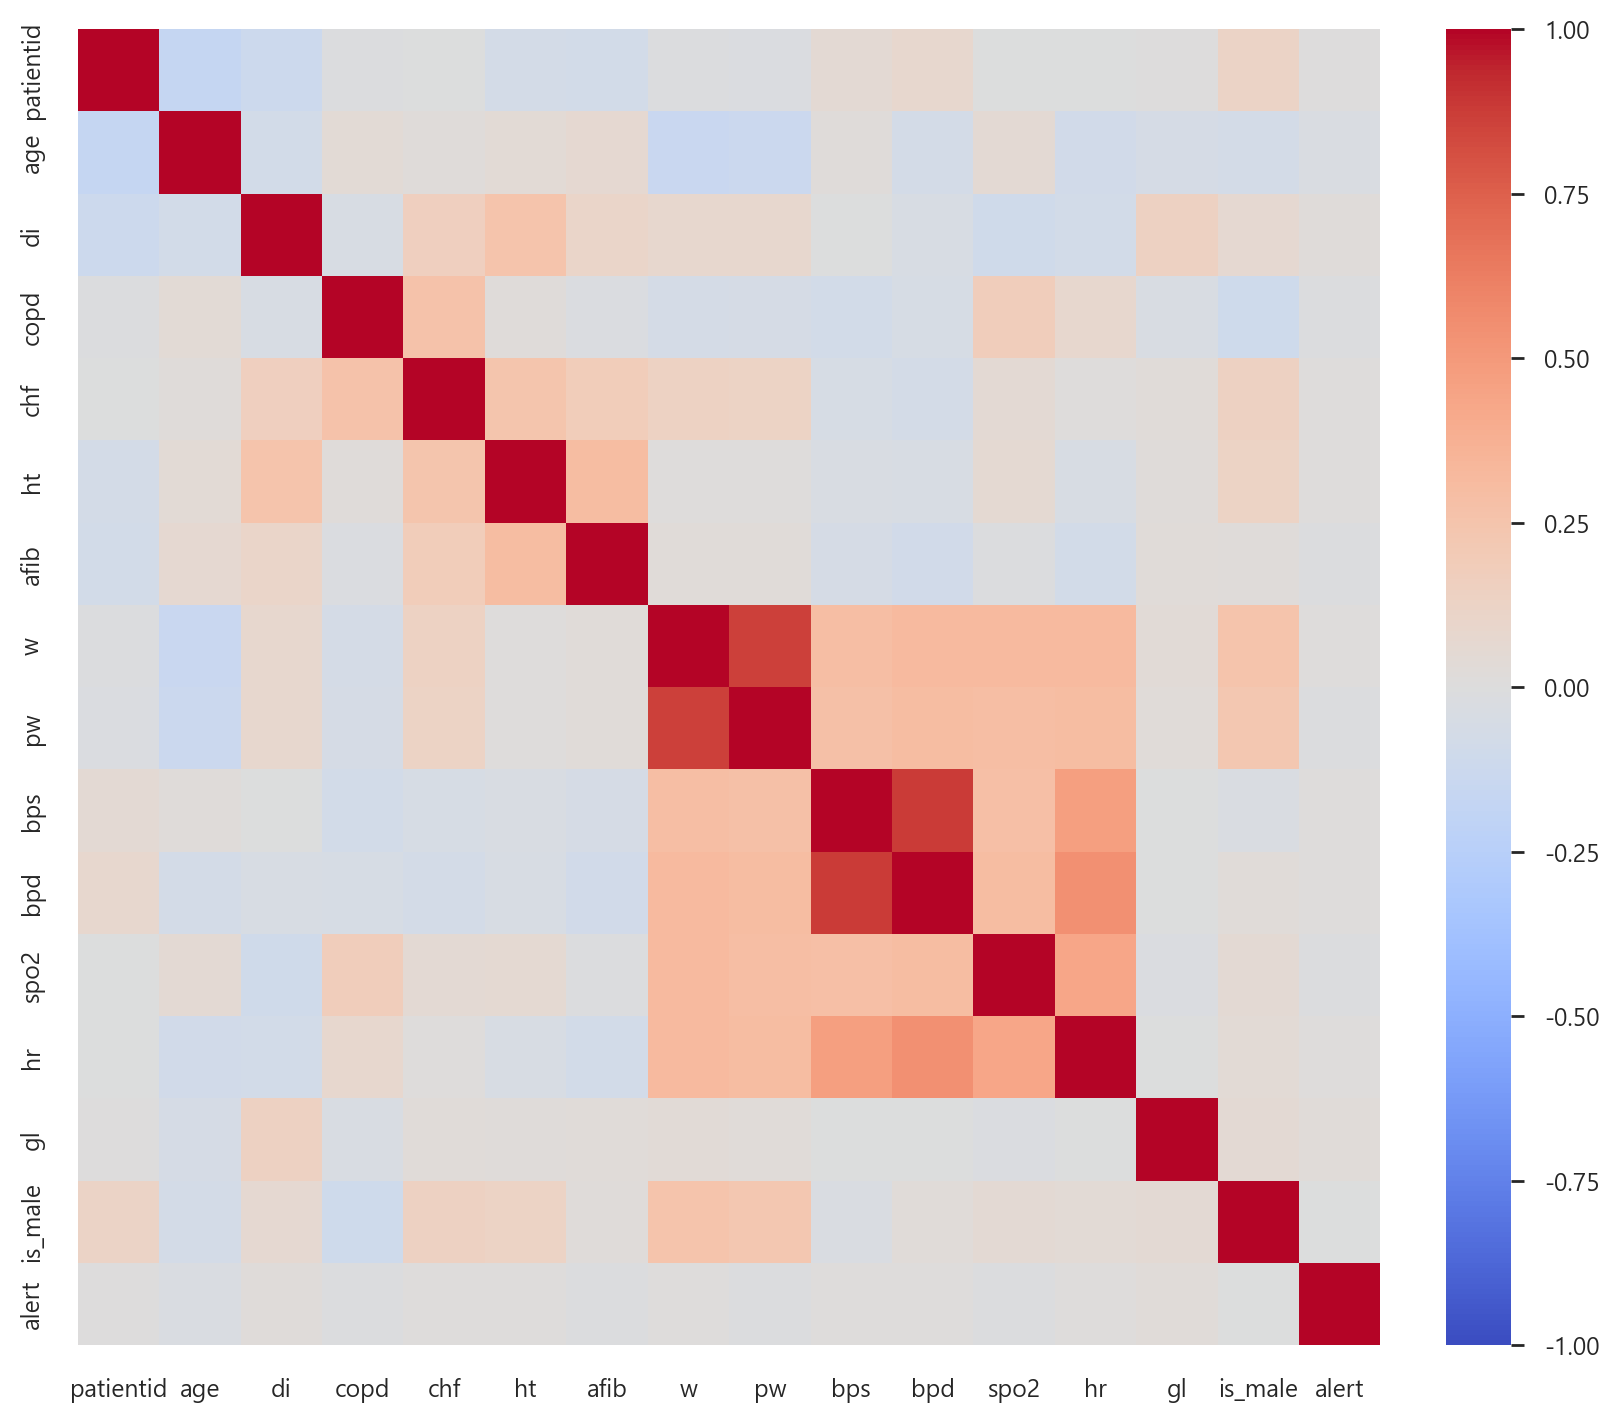

In [22]:
fig, ax = plt.subplots(figsize=(8,7))
sns.heatmap(train_df.drop(columns=['timestamp']).corr(),
            cmap='coolwarm',
            vmax=1,
            vmin=-1,
            ax=ax);

### 몸무게 합치기
- 최근 무게가 있으면 그것을 이용하고 없으면 이전 무게로 둘다 비어있으면 없애기

In [23]:
train_df = train_df[(train_df['pw'] != 0) | (train_df['w'] != 0)]
train_df.loc[train_df['pw'] == 0,'pw'] = train_df.loc[train_df['pw'] == 0,'w']

<Axes: xlabel='age', ylabel='pw'>

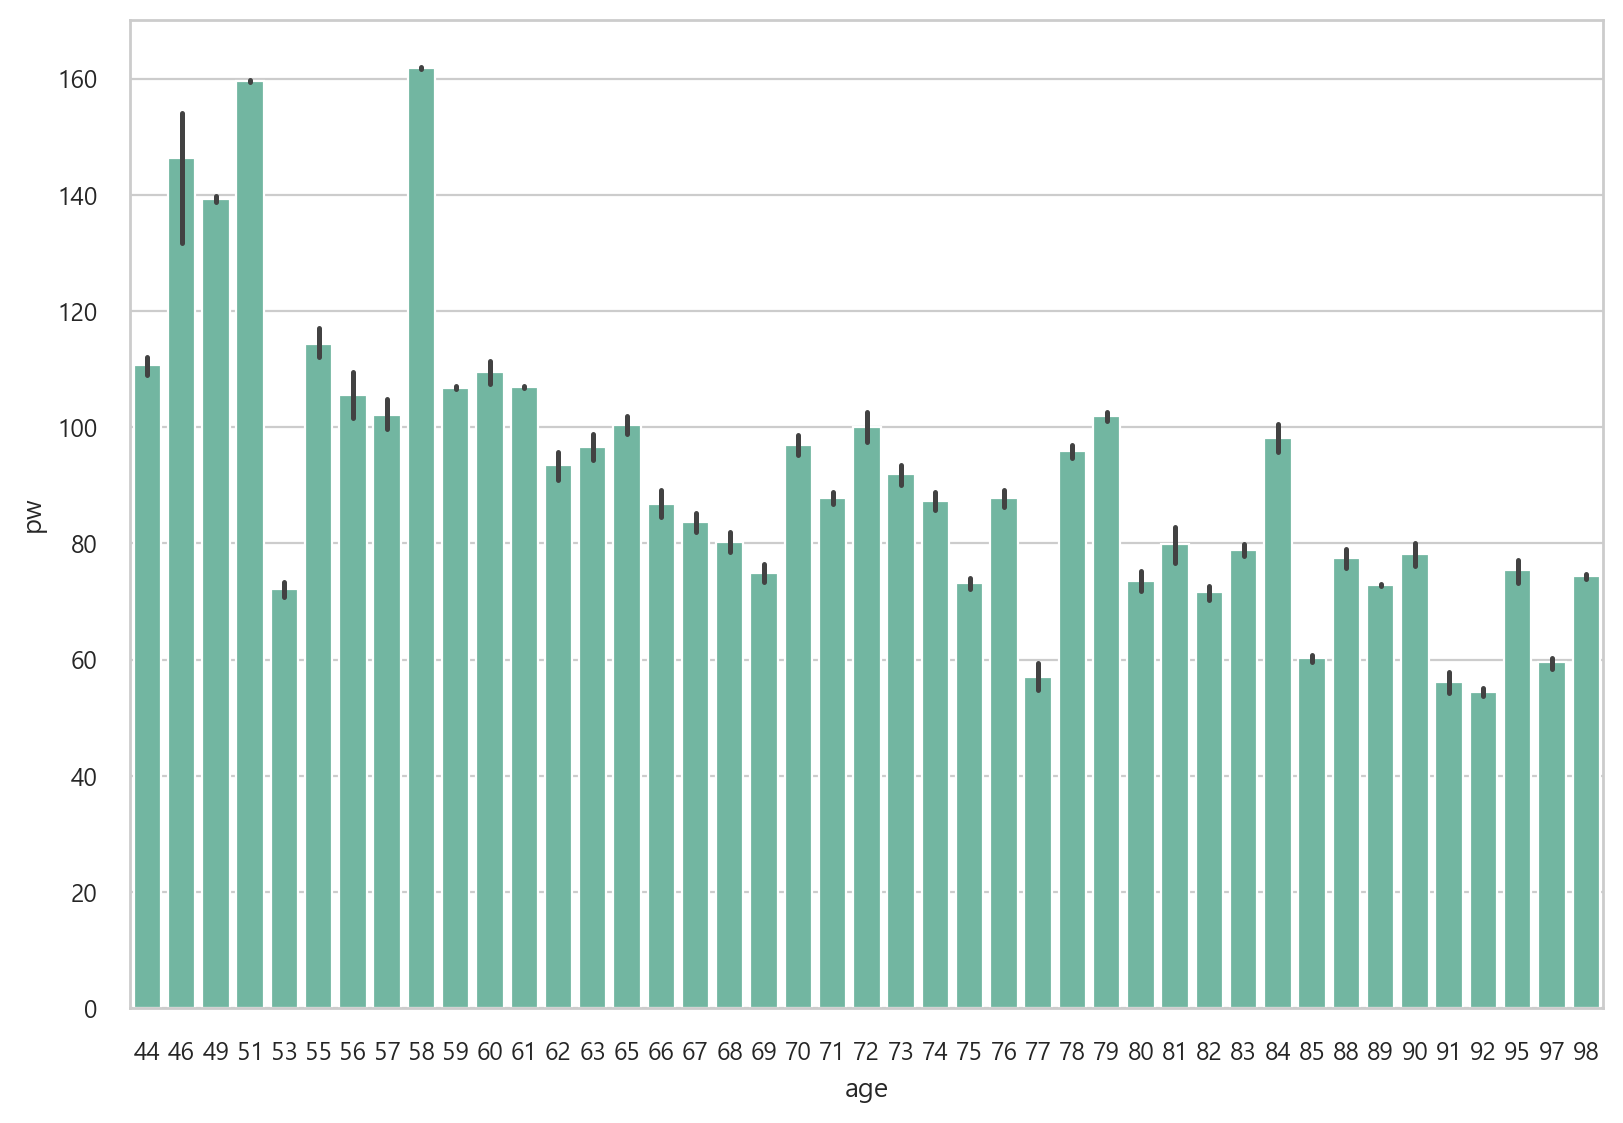

In [24]:
sns.barplot(data=train_df,
               x = 'age',
               y = 'pw',)

In [25]:
final_test.loc[final_test['pw'] == 0,'pw'] = train_df['pw'].mean()

In [26]:
train_df.drop(columns=['w'],inplace=True)
final_test.drop(columns=['w'],inplace=True)

### 혈당지수 column 드랍 처리
- 너무 많으므로

In [27]:
train_df.drop(columns=['gl'], inplace=True)
final_test.drop(columns=['gl'], inplace=True)

In [28]:
train_df.columns

Index(['patientid', 'timestamp', 'age', 'di', 'copd', 'chf', 'ht', 'afib',
       'pw', 'bps', 'bpd', 'spo2', 'hr', 'is_male', 'alert'],
      dtype='object')

C:\Users\crazy\AppData\Local\Temp\ipykernel_1088\3518573804.py:11: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


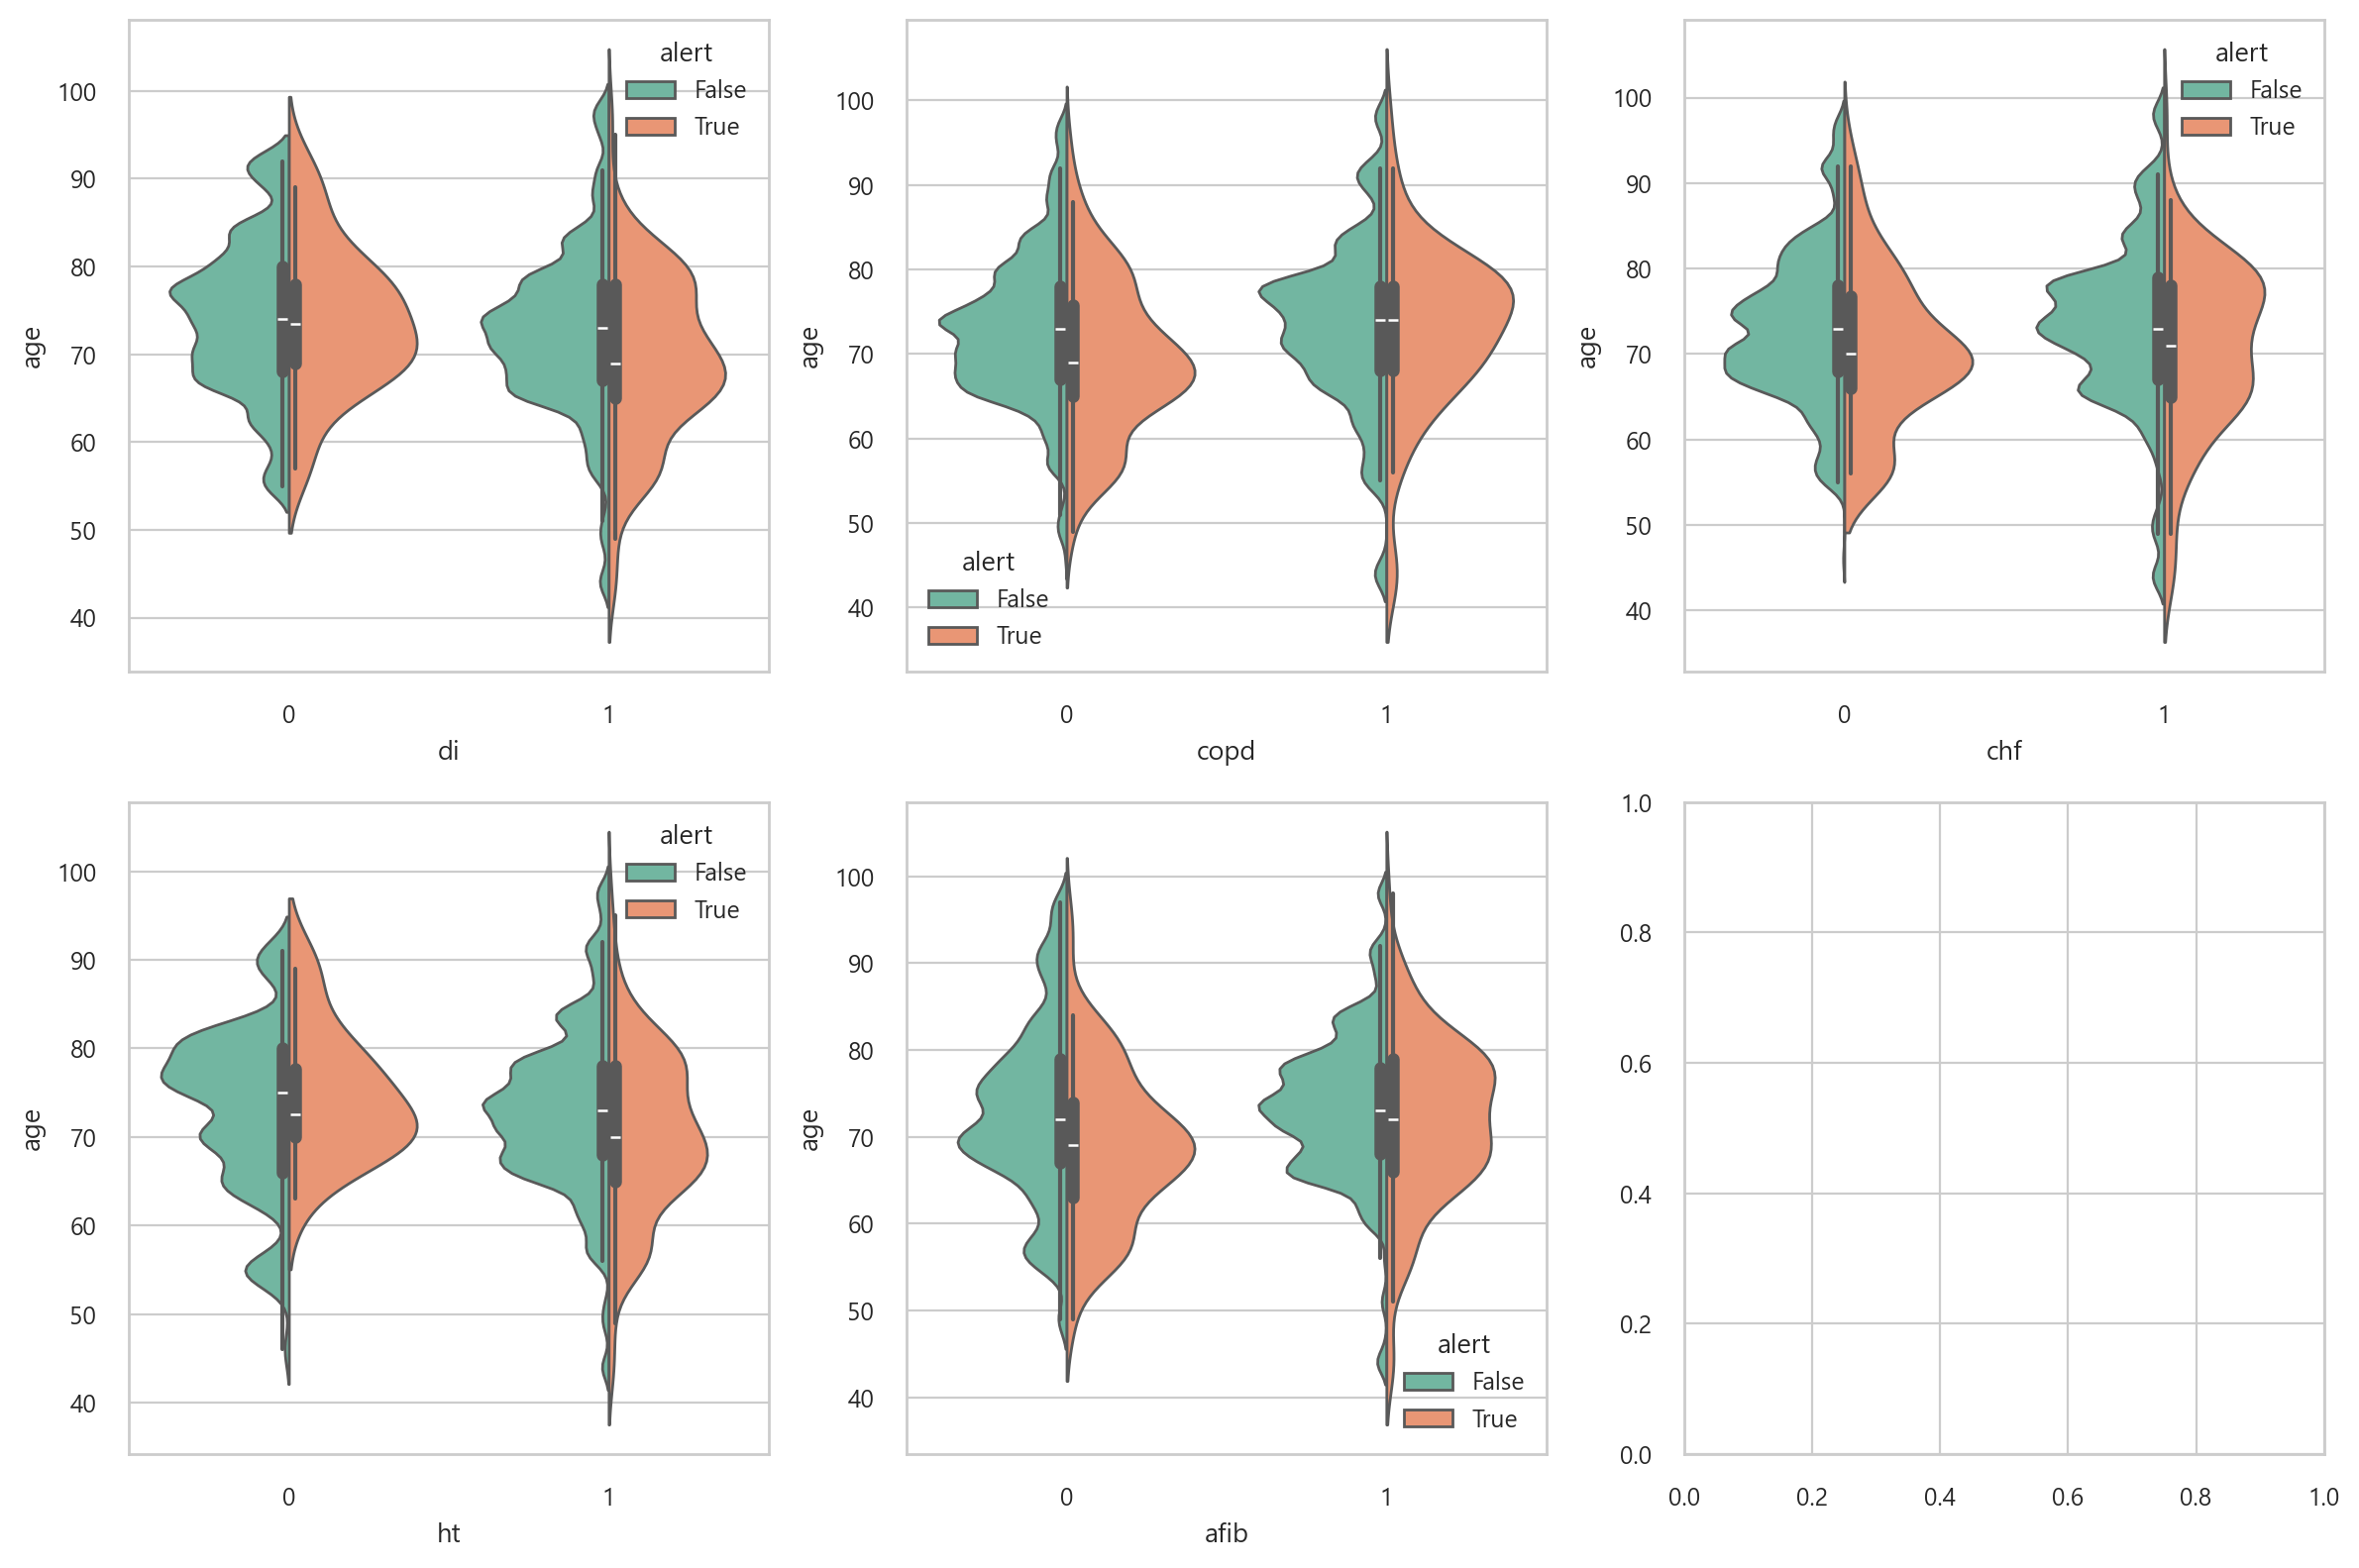

In [29]:
# 환자 정보 이상과 나이와의 관계 확인해보기
fig, ax = plt.subplots(2, 3, figsize=(12, 8))
ax = ax.flatten()
for i in range(3, 8):
    sns.violinplot(data=train_df,
                   x=train_df.columns[i],
                   y='age',
                   split=True,
                   hue='alert',
                   ax=ax[i-3])
plt.tight_layout()
plt.show();

### 정상 범위가 아닌 혈업 및 산소 포화도 확인

<Axes: >

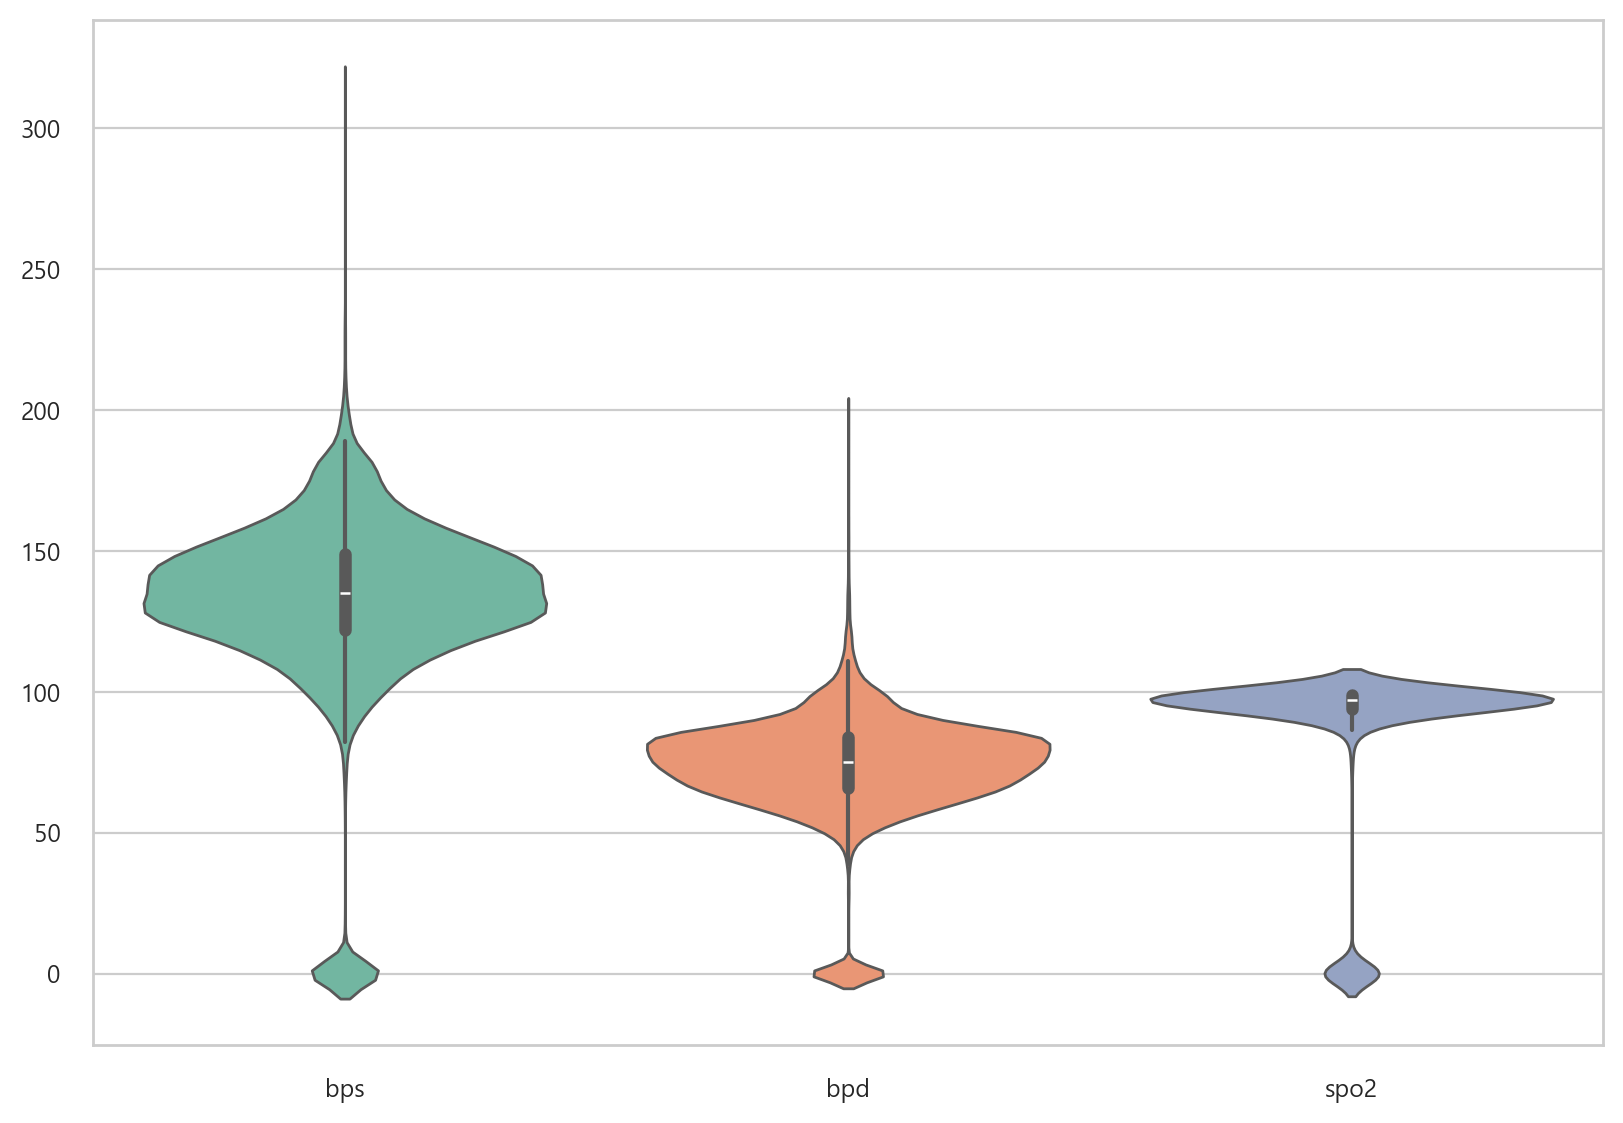

In [30]:
sns.violinplot(train_df[['bps', 'bpd', 'spo2']])

In [31]:
# 0 인 값은 이상치... 각 이상치의 갯수 확인
all_0_weirdo = (train_df['bps'] == 0)
# 수치 3 값이 모두 이상한 0 값 drop 시키자!

train_df = train_df.drop(train_df[all_0_weirdo].index)

train_df[train_df['bps'] == 0]
# spo2 처리

# ... 음...꽤 많으니 이상치 평균으로 처리하자 
print(len(train_df[train_df['spo2'] == 0]))

# 나이대별 평균으로 채우기
print('나이대별 혈중 산소 포화도')
for i in range(5,11):
    ages = (train_df['age'] < i*10) & (train_df['age'] > (i-1)*10)
    spo2_is_zero = train_df['spo2'] == 0
    print(train_df[ages]['spo2'].mean())
    train_df.loc[ages & spo2_is_zero, 'spo2'] = train_df[ages]['spo2'].mean()

1753
나이대별 혈중 산소 포화도
96.51525423728813
93.40537745604964
86.92536516818409
89.56906551495234
86.37168403512617
94.85840011950421


In [32]:
final_test

# 0 인 값은 이상치... 각 이상치의 갯수 확인
all_0_weirdo = (final_test['bps'] == 0)
# 수치 3 값이 모두 이상한 0 값 drop 시키자!

# final_test = final_test.drop(final_test[all_0_weirdo].index)
# spo2 처리

# ... 음...꽤 많으니 이상치 평균으로 처리하자 
print(len(final_test[final_test['spo2'] == 0]))

# 나이대별 평균으로 채우기
print('나이대별 혈중 산소 포화도')
for i in range(5,11):
    ages_fin = (final_test['age'] < i*10) & (final_test['age'] > (i-1)*10)
    spo2_is_zero = final_test['spo2'] == 0
    # 여기에서 평균은 테스트 데이터에서 가져와야 함
    print(train_df[ages]['spo2'].mean())
    final_test.loc[ages_fin & spo2_is_zero, 'spo2'] = train_df[ages]['spo2'].mean()

1301
나이대별 혈중 산소 포화도
96.65950898253277
96.65950898253277
96.65950898253277
96.65950898253277
96.65950898253277
96.65950898253277


In [33]:
# 그래도 spo2 가 0 인 환자 제거
spo2_is_zero = train_df['spo2'] == 0
train_df = train_df.drop(index=train_df[spo2_is_zero].index)

# 테스트는 제거 X
spo2_is_zero = final_test['spo2'] == 0
final_test.loc[spo2_is_zero,'spo2'] = train_df['spo2'].mean()

<Axes: >

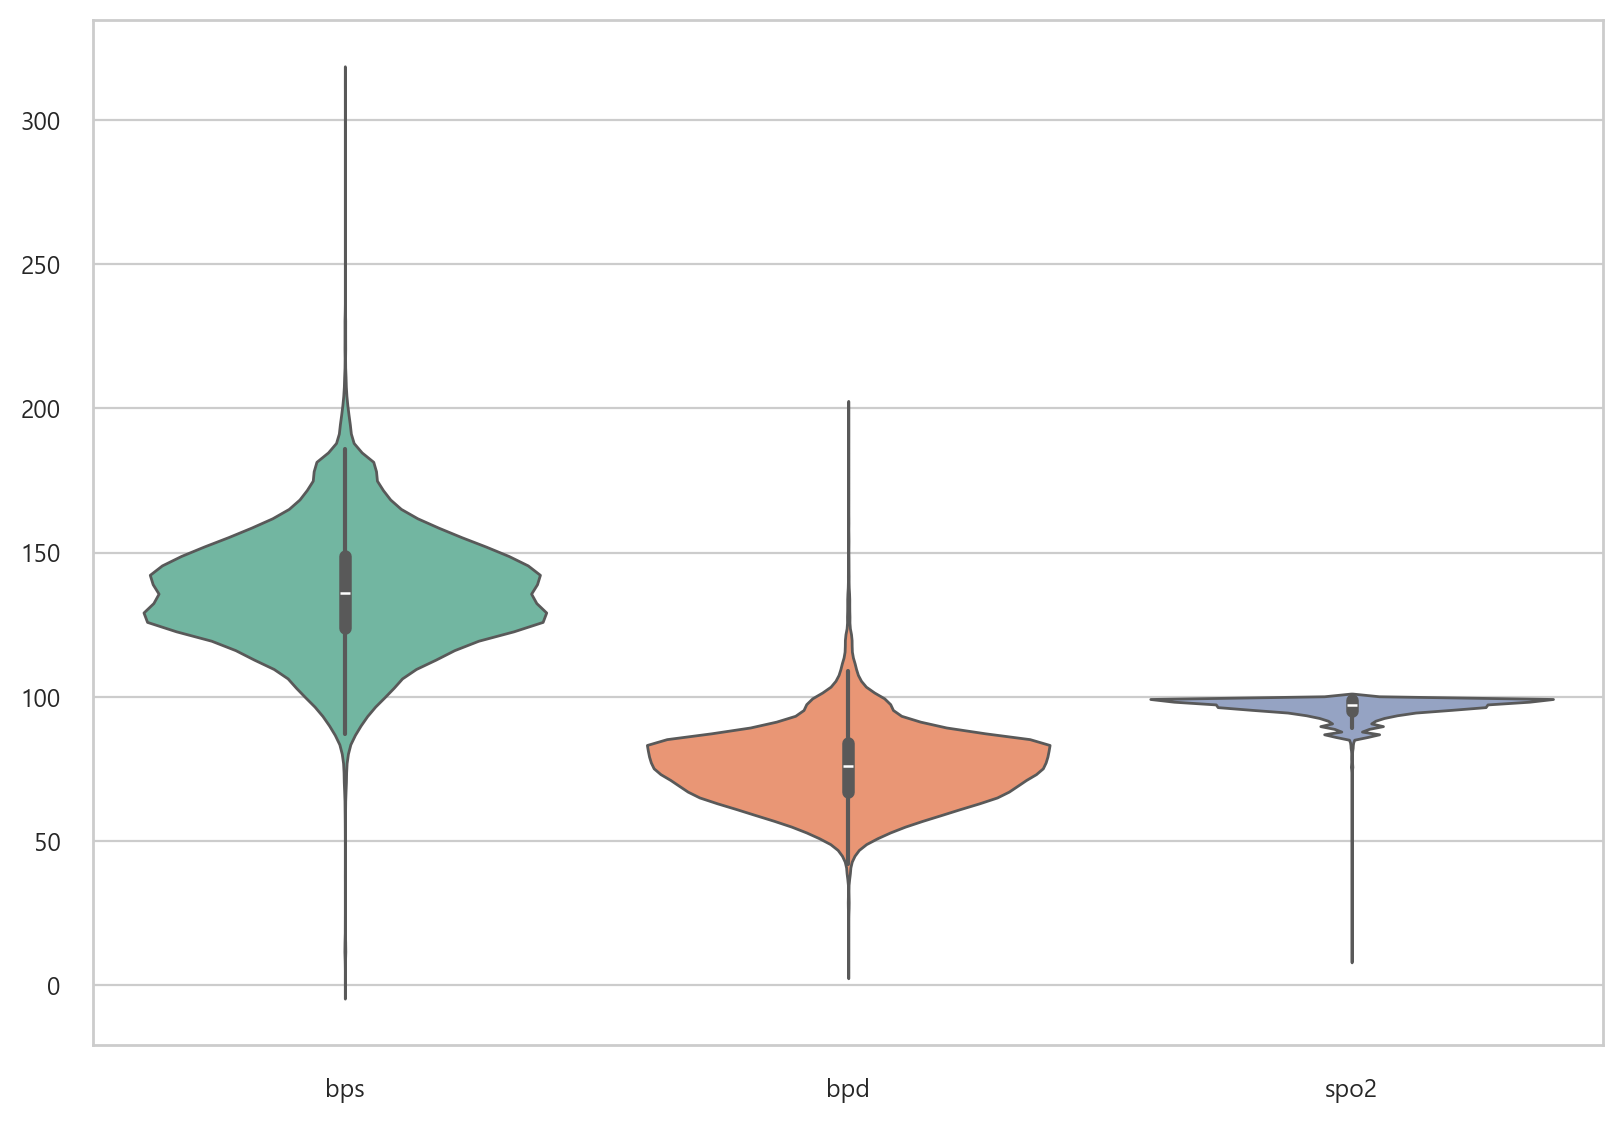

In [34]:
sns.violinplot(train_df[['bps', 'bpd', 'spo2']])

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

In [36]:
x_train, x_test, y_train, y_test = train_test_split(train_df.iloc[:,2:-1],train_df.iloc[:,-1])

In [37]:
y_train.unique()

array([False,  True])

In [38]:
model = DecisionTreeClassifier()
model.fit(x_train,y_train)
pred_ = model.predict(x_test)

print(classification_report(y_test,pred_))

              precision    recall  f1-score   support

       False       0.99      0.98      0.99      4932
        True       0.04      0.05      0.04        60

    accuracy                           0.97      4992
   macro avg       0.51      0.52      0.51      4992
weighted avg       0.98      0.97      0.97      4992



In [39]:
model_RF = RandomForestClassifier()
model_RF.fit(x_train,y_train)
pred_ = model_RF.predict(x_test)

print(classification_report(y_test,pred_))

              precision    recall  f1-score   support

       False       0.99      1.00      0.99      4932
        True       0.00      0.00      0.00        60

    accuracy                           0.99      4992
   macro avg       0.49      0.50      0.50      4992
weighted avg       0.98      0.99      0.98      4992



c:\Users\crazy\.conda\envs\tensor-gpu\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\crazy\.conda\envs\tensor-gpu\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\crazy\.conda\envs\tensor-gpu\lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [40]:
model_adb = AdaBoostClassifier()
model_adb.fit(x_train,y_train)
pred_ = model_adb.predict(x_test)

print(classification_report(y_test,pred_))

c:\Users\crazy\.conda\envs\tensor-gpu\lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

       False       0.99      1.00      0.99      4932
        True       0.00      0.00      0.00        60

    accuracy                           0.99      4992
   macro avg       0.49      0.50      0.50      4992
weighted avg       0.98      0.99      0.98      4992



In [41]:
final_test[x_test.columns]

,age,di,copd,chf,ht,afib,pw,bps,bpd,spo2,hr,is_male
0,75,1,0,0,1,1,62.595696,108.0,75,97.000000,85,False
1,60,1,1,0,1,1,104.280801,176.0,99,96.000000,81,False
2,76,0,0,0,0,0,107.954896,139.0,85,96.659509,91,True
3,79,1,0,1,1,0,102.511792,114.0,46,92.000000,77,True
4,80,1,0,0,1,1,55.701098,111.0,57,95.000000,71,True
...,...,...,...,...,...,...,...,...,...,...,...,...
7124,74,1,0,0,1,1,57.787621,126.0,63,98.000000,89,False
7125,65,1,0,1,1,1,123.830616,167.0,106,96.659509,70,False
7126,68,1,1,0,1,0,87.364930,146.0,65,90.366669,77,False
7127,61,1,0,0,1,0,108.408488,142.0,75,98.000000,78,True


In [42]:
# 정답지 형식 만들기

# 모델 별 예측 결과
pred1 = model.predict(final_test[x_test.columns])
# 1. DT
print(sum(pd.Series(pred1, name='alert')) / len(pred1))

pred2 = model_RF.predict(final_test[x_test.columns])
# 2. RF
print(sum(pd.Series(pred2, name='alert')) / len(pred2))

pred3 = model_adb.predict(final_test[x_test.columns])
# 3. adb
print(sum(pd.Series(pred3, name='alert')) / len(pred3))

# 머신러닝을 봤을떄 DT 가 좀더 테스트의 정답 라벨 비율(약1프로)과 비슷하므로 DT로 결정!

pd.DataFrame(np.array([pred1]).reshape(len(pred1)), index=range(0,len(pred1)), columns=['alert']).astype(int).to_csv('정답지.csv', index=False)

0.055547762659559546
0.00042081638378454203
0.00014027212792818068


### 딥러닝

In [43]:
import tensorflow as tf

In [44]:
final_test = final_test[x_train.columns]

In [45]:
x_train = x_train/x_train.max()
x_test = x_test/x_train.max()
final_test = final_test/x_train.max()

In [46]:
x_train_tensor = tf.convert_to_tensor(x_train, float)
x_test_tensor = tf.convert_to_tensor(x_test, float)
final_test_tensor = tf.convert_to_tensor(final_test, float)

In [47]:
y_test_tensor = tf.keras.utils.to_categorical(y_test)
y_train_tensor = tf.keras.utils.to_categorical(y_train)

In [48]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.metrics import Precision, AUC
from tensorflow.keras.callbacks import EarlyStopping

inputs = keras.Input(shape=(12,))
dense = layers.Dense(128, activation='relu')(inputs)
dropout = layers.Dropout(0.25)(dense)
dense = layers.Dense(64, activation='relu')(dropout)
dropout = layers.Dropout(0.25)(dense)
dense = layers.Dense(32, activation='relu')(dropout)
dropout = layers.Dropout(0.25)(dense)
dense = layers.Dense(64, activation='relu')(dropout)
dropout = layers.Dropout(0.25)(dense)
dense = layers.Dense(128, activation='relu')(dropout)
output = layers.Dense(2, activation='softmax')(dense)

model_fnn = keras.Model(inputs=inputs, outputs=output, name='FNN')
model_fnn.summary()

model_fnn.compile(
    loss='categorical_crossentropy',
    optimizer=keras.optimizers.RMSprop(),
    metrics=[AUC()],
)

Model: "FNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 12)]              0         
                                                                 
 dense (Dense)               (None, 128)               1664      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0       

In [49]:
model_fnn.fit(x_train_tensor,y_train_tensor,
              validation_data=(x_test_tensor,y_test_tensor),
              batch_size=10000,epochs=200)

Epoch 1/200
2/2 [==============================] - 2s 254ms/step - loss: 0.6832 - auc: 0.5604 - val_loss: 0.4407 - val_auc: 0.9880
Epoch 2/200
2/2 [==============================] - 0s 30ms/step - loss: 0.4309 - auc: 0.9894 - val_loss: 1.4988 - val_auc: 0.9880
Epoch 3/200
2/2 [==============================] - 0s 32ms/step - loss: 0.2043 - auc: 0.9893 - val_loss: 2.7504 - val_auc: 0.9880
Epoch 4/200
2/2 [==============================] - 0s 31ms/step - loss: 0.1100 - auc: 0.9884 - val_loss: 3.6831 - val_auc: 0.9880
Epoch 5/200
2/2 [==============================] - 0s 29ms/step - loss: 0.0836 - auc: 0.9886 - val_loss: 4.2914 - val_auc: 0.9880
Epoch 6/200
2/2 [==============================] - 0s 31ms/step - loss: 0.0765 - auc: 0.9885 - val_loss: 4.6520 - val_auc: 0.9880
Epoch 7/200
2/2 [==============================] - 0s 28ms/step - loss: 0.0755 - auc: 0.9881 - val_loss: 4.8905 - val_auc: 0.9880
Epoch 8/200
2/2 [==============================] - 0s 29ms/step - loss: 0.0729 - auc: 0.9

### AUC socores

In [50]:
from sklearn.metrics import roc_auc_score, auc, roc_curve


In [51]:
# 모델 1
y_scores = model.predict_proba(x_test)[:, 1]  # 양성 클래스의 확률
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
dt_auc = auc(fpr, tpr)

# 모델 2
y_scores_RF = model_RF.predict_proba(x_test)[:, 1]  # 양성 클래스의 확률
fpr, tpr, thresholds = roc_curve(y_test, y_scores_RF)
rf_auc = auc(fpr, tpr)

# 모델 3
y_scores_adb = model_adb.predict_proba(x_test)[:, 1]  # 양성 클래스의 확률
fpr, tpr, thresholds = roc_curve(y_test, y_scores_adb)
adb_auc = auc(fpr, tpr)

In [53]:
print('DT의 auc',dt_auc)
print('RF의 auc',rf_auc)
print('ADBoost의 auc',adb_auc)

DT의 auc 0.5167883211678833
RF의 auc 0.7051145579886455
ADBoost의 auc 0.5912256690997566
